                                   ** Anemia Detection from Eyelid photograph **


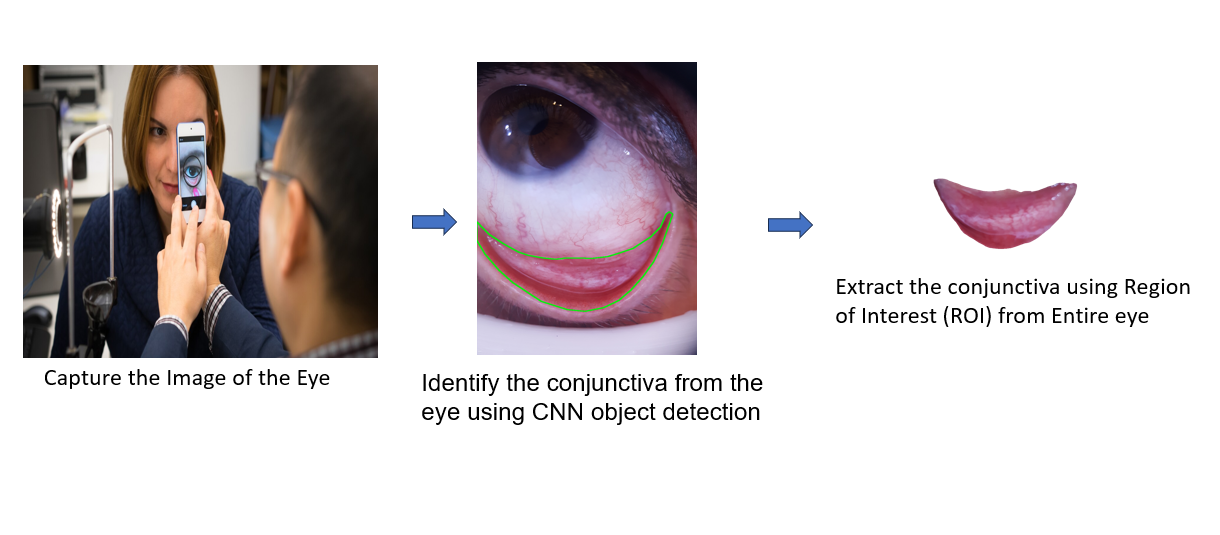

# Step: 1. capture the image of the eye using Mobile Camera.

# Step: 2. Identify the conjunctiva from the eye using CNN object detection.

# Step: 3. Extract the conjunctiva using roi from Entire Eye.

# Step: 4. Data Cleaning & Preprocess the image 

# Step: 5. Feature Extraction 


# Compute the mean, median, and standard deviation for the R, G, B channels.and other features like Age ,Gender also used.

# Step: 6.Split the Data for test and train.


# Step: 7.Train the model. 

# Step: 8.Model evaluation:
1. Mean Absolute Error(MAE).
   
2. Mean Squared Error(MSE).
3. R-square
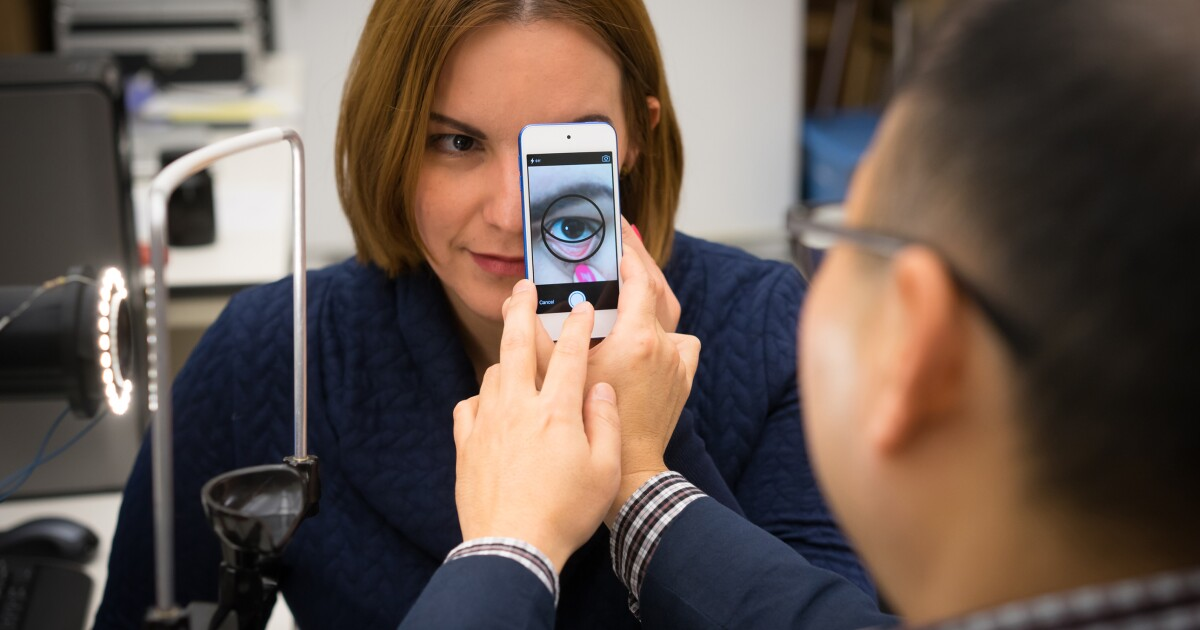
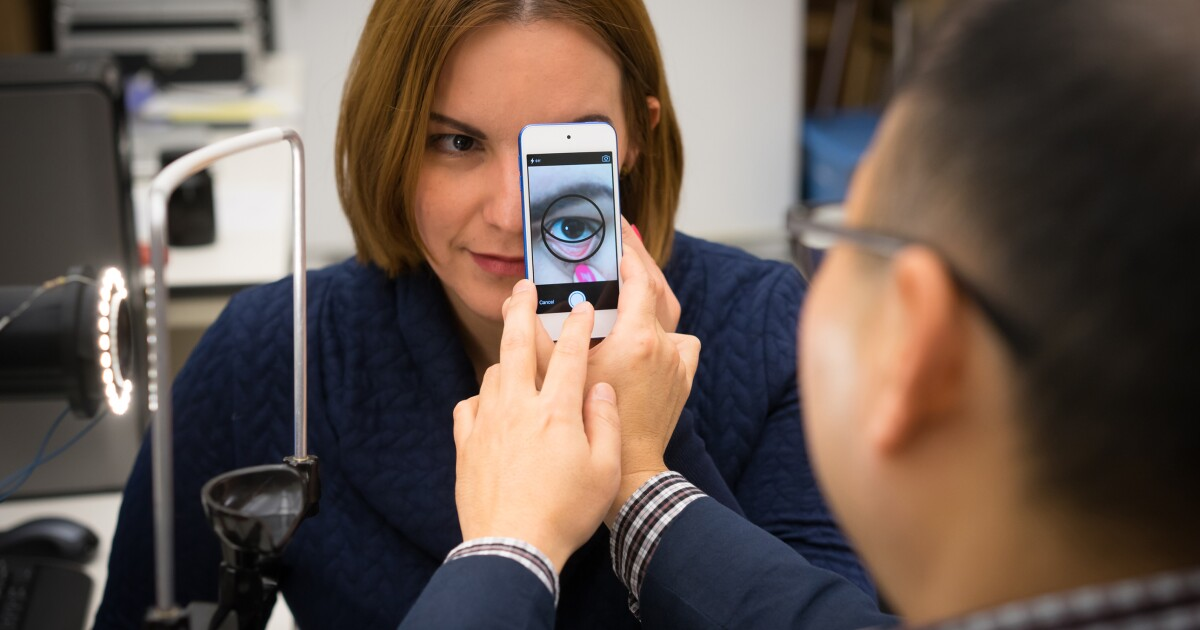

# Dataset:https://ieee-dataport.org/documents/eyes-defy-anemia 
# Sample Data:
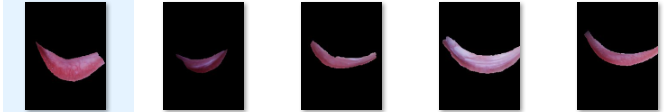
# Sample CSV data
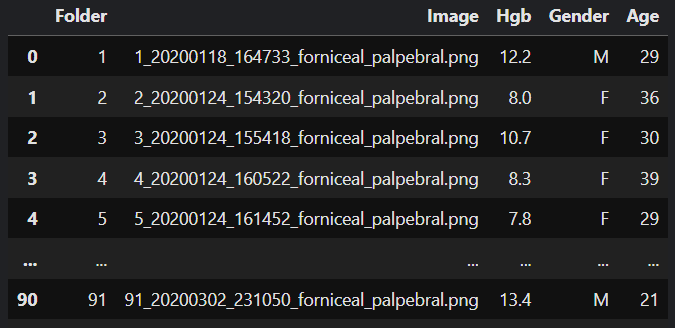

# Import the Libraries:

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os 
import shutil
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load the data

In [5]:
#load the csv file:
data_csv = pd.read_csv('/kaggle/input/india-anemia-dataset/INDIAMain_output_data.csv')
data_csv

,Folder,Image,Hgb,Gender,Age
0,1,1_20200118_164733_forniceal_palpebral.png,12.2,M,29
1,2,2_20200124_154320_forniceal_palpebral.png,8.0,F,36
2,3,3_20200124_155418_forniceal_palpebral.png,10.7,F,30
3,4,4_20200124_160522_forniceal_palpebral.png,8.3,F,39
4,5,5_20200124_161452_forniceal_palpebral.png,7.8,F,29
...,...,...,...,...,...
90,91,91_20200302_231050_forniceal_palpebral.png,13.4,M,21
91,92,92_20200312_183626_forniceal_palpebral.png,13.7,F,55
92,93,93_20200315_161347_forniceal_palpebral.png,12.7,M,29
93,94,94_20200318_130148_forniceal_palpebral.png,11.1,F,53


In [6]:
# Extract image paths, metadata, and target labels
image_dir = '/kaggle/input/india-anemia-dataset/INDIAMain_Output India'
labels = data_csv['Hgb']  # Target variable for regression
ages = data_csv['Age']  # Age feature
gender = data_csv['Gender']

# Feature Extraction

In [7]:
# Function to extract features from an image
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))  # Resize for consistent features
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Flatten color channels into a single vector
    color_intensity = img.flatten()
    
    # Compute additional features (e.g., mean and std of each channel)
    mean_r, mean_g, mean_b = np.mean(img[:, :, 0]), np.mean(img[:, :, 1]), np.mean(img[:, :, 2])
    std_r, std_g, std_b = np.std(img[:, :, 0]), np.std(img[:, :, 1]), np.std(img[:, :, 2])
    
    # Combine features into a single array
    features = np.hstack((color_intensity, [mean_r, mean_g, mean_b, std_r, std_g, std_b]))
    return features

In [8]:
# Extract features for all images
features = []
for index, row in data_csv.iterrows():
    image_path = os.path.join(image_dir, row['Image'])  # Combine directory with image filename
    features.append(extract_features(image_path))
features = np.array(features)

libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng warning: iCCP: CRC error
libpng w

In [9]:
# Combine image features with additional metadata
metadata = data_csv[['Age']].values  # Use age and  as additional features
X = np.hstack((features, metadata))  # Combine image and metadata features ,(short for horizontal stack) is a function used to concatenate arrays horizontally (column-wise)
y = labels.values  # Target label

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [12]:
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4.752698619617055


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
# Initialize and train the Random Forest model
model_2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [16]:
# Predict on the test set
y_pred_rf = model_2.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")

Mean Squared Error: 4.323035263157889
